# Task 6.2 Exploring Relationships - Rhode Island

### Contents
** **
A) Introduction to per-region analysis.

Step 1:  Standard prerequisites, including library loading, path setup, and data import from Task 1.

Step 2:  Picking out variables suitable for exploratory visual analysis, based on the questions defined in Task 6.1.

Step 3:  Correlation matrix heatmap (colored).

Step 4:  Scatterplots for the variables with the strongest correlations, and examination of the nature of their relationships.

Step 5:  Pair plot of the entire data set.

Step 6:  Categorical plots.

Step 7:  Revisiting questions posed in Task 1.

Step 8:  Discussion of hypothesis (or lack thereof).

# Introduction to per-region analysis.

## Analyzing the entire original dataset has failed to produce promising correlations.  This might be because the data is for too large and varied a geographical area, namely all 48 of the contiguous United States; weather is bound to vary significantly.

### According to the National Oceanic and Atmospheric Administration's (NOAA) National Centers for Environmental Information (NCEI), the area of the contiguous United States can be divided into nine distinct climatic regions, each comprising a group of states:

### 1) Northeast:  Connecticut, Delaware, Maine, Maryland, Massachusetts, New Hampshire, New Jersey, New York, Pennsylvania, Rhode Island, Vermont
### 2) Upper Midwest:  Iowa, Michigan, Minnesota, Wisconsin
### 3) Ohio Valley:  Illinois, Indiana, Kentucky, Missouri, Ohio, Tennessee, West Virginia
### 4) Southeast:  Alabama, Florida, Georgia, North Carolina, South Carolina, Virginia
### 5) Northern Rockies and Plains:  Montana, Nebraska, North Dakota, South Dakota, Wyoming
### 6) South:  Arkansas, Kansas, Louisiana, Mississippi, Oklahoma, Texas
### 7) Southwest:  Arizona, Colorado, New Mexico, Utah
### 8) Northwest:  Idaho, Oregon, Washington
### 9) West:  California, Nevada

### From https://www.ncei.noaa.gov/access/monitoring/reference-maps/us-climate-regions :
#### "Through climate analysis, National Centers for Environmental Information scientists have identified nine climatically consistent regions within the contiguous United States which are useful for putting current climate anomalies into a historical perspective (Karl and Koss, 1984)."
##### Source:  Thomas R. Karl and Walter James Koss, 1984: "Regional and National Monthly, Seasonal, and Annual Temperature Weighted by Area, 1895-1983." Historical Climatology Series 4-3, National Climatic Data Center, Asheville, NC, 38 pp.


## I have split the df_all_states_regions dataframe into a separate dataframe for each region.  This offers two advantages.
## 1) Each region can be analyzed separately for correlations and trends.
## 2) CPU-intensive operations can be run for reach region in a separate Jupyter Notebook, allowing us to take advantage of multiple CPUs for simultaneous processing, avoiding the singl-CPU bottleneck.

## This split was done in an Addendum section added to my previously-approved Jupyter Notebook for Task 6.2.
## The STATE to be studied in this current Notebook is Rhode Island, which is in the *'Northeast'* region.
## The relevant dataframe is stored in the file called *df_northeast.Task-6.2.pkl* .

# Step 1:  Standard prerequisites, including library loading, path setup, and data import for the given region.

## Standard prerequisites.  Now with additional libraries seaborn, matplotlib, and scipy.

In [88]:
# Import libraries
import pandas as pd
# I'm trying modin as a drop-in replace-- er, enhancement to pandas; supposedly it will help use more than one CPU core.
# Nope.  I'm having too much trouble getting modin installed, so it's back to plain old Pandas for now. :-(
# import modin.pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [89]:
# For future reference, Exercise 6.2 introduced graphical libraries Bokeh and Plotly.
# import bokeh
# import plotly

In [90]:
# Starting with Exercise 4.7, import additional libraries I've discovered thanks to Lubov, especially the time library.
import time
import string
import random

In [91]:
# Import itertools to help loop through lots of things.
import itertools

In [92]:
# I want to convert Date-Timestamps into UNIX Epoch time for analysis.
from datetime import datetime

In [93]:
# Set a PATH variable.

In [94]:
# Linux PATH, local - Sadly, my Linux system with 8GB of total RAM could not import the full dataset.
# I have moved to an AWS EC2 instance that should be able to handle this.

In [95]:
## path = (r'~/careerfoundry/tasks/data-immersion/Achievement6/Project/02-Data/Original-Data/US-Weather-Events.2016-2021/www.kaggle.com/datasets/sobhanmoosavi/us-weather-events')

### # Oh, wow, matplotlib.pyplot.savefig function does not expand the tilde (~) reference in directory paths.  LAME. :(

In [96]:
path = (r'/home/ubuntu/careerfoundry/tasks/data-immersion/Achievement6/Project/')

In [97]:
# windoze PATH - The windoze laptop I bought for Excel and Tableau also has 16GB of RAM.

In [98]:
## path = (r'C:\Users\emccc\OneDrive\Documents\CareerFoundry\Achievement-4\Instacart-Basket-Analysis')

## Load our digested data for the region.

In [99]:
region_code = 'northeast'

In [100]:
#print(os.path.join(path, '02-Data', 'Prepared-Data', 'df_northeast.Task-6.2.pkl'))
print(os.path.join(path, '02-Data', 'Prepared-Data', 'df_' + region_code + '.Task-6.2.pkl'))

/home/ubuntu/careerfoundry/tasks/data-immersion/Achievement6/Project/02-Data/Prepared-Data/df_northeast.Task-6.2.pkl


In [102]:
df_region = pd.read_pickle(os.path.join(path, '02-Data','Prepared-Data', 'df_northeast.Task-6.2.pkl'))

In [103]:
df = df_region.loc[df_region['State'] == 'RI']

In [104]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22387 entries, 58939 to 6221832
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   EventId                         22387 non-null  object 
 1   Type                            22387 non-null  object 
 2   Severity                        22387 non-null  object 
 3   StartTime(UTC)                  22387 non-null  object 
 4   EndTime(UTC)                    22387 non-null  object 
 5   Precipitation(in)               22387 non-null  float64
 6   TimeZone                        22387 non-null  object 
 7   AirportCode                     22387 non-null  object 
 8   LocationLat                     22387 non-null  float64
 9   LocationLng                     22387 non-null  float64
 10  County                          22387 non-null  object 
 11  State                           22387 non-null  object 
 12  StartTime(Epoch)          

In [105]:
df.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,County,State,StartTime(Epoch),EndTime(Epoch),Duration(seconds),Duration(hours),PrecipitationRate(inches/hour),Disbelievable,Region
58939,W-59666,Cold,Severe,2016-01-01 05:53:00,2016-01-04 15:17:00,0.0,US/Eastern,KWST,41.3509,-71.8054,Washington,RI,1451627580,1451920620,293040,81.40,0.0,TBD,Northeast
58940,W-59667,Snow,Light,2016-01-04 15:17:00,2016-01-04 15:53:00,0.0,US/Eastern,KWST,41.3509,-71.8054,Washington,RI,1451920620,1451922780,2160,0.60,0.0,TBD,Northeast
58941,W-59668,Cold,Severe,2016-01-04 15:53:00,2016-01-04 17:38:00,0.0,US/Eastern,KWST,41.3509,-71.8054,Washington,RI,1451922780,1451929080,6300,1.75,0.0,TBD,Northeast
58942,W-59669,Snow,Light,2016-01-04 17:38:00,2016-01-04 17:53:00,0.0,US/Eastern,KWST,41.3509,-71.8054,Washington,RI,1451929080,1451929980,900,0.25,0.0,TBD,Northeast
58943,W-59670,Snow,Light,2016-01-04 18:53:00,2016-01-04 19:53:00,0.0,US/Eastern,KWST,41.3509,-71.8054,Washington,RI,1451933580,1451937180,3600,1.00,0.0,TBD,Northeast


In [106]:
df.tail()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,County,State,StartTime(Epoch),EndTime(Epoch),Duration(seconds),Duration(hours),PrecipitationRate(inches/hour),Disbelievable,Region
6221828,W-6303073,Rain,Light,2021-12-31 07:08:00,2021-12-31 07:31:00,0.0,US/Eastern,KSFZ,41.9208,-71.4914,Providence,RI,1640934480,1640935860,1380,0.383333,0.0,TBD,Northeast
6221829,W-6303074,Fog,Severe,2021-12-31 07:31:00,2021-12-31 07:56:00,0.0,US/Eastern,KSFZ,41.9208,-71.4914,Providence,RI,1640935860,1640937360,1500,0.416667,0.0,TBD,Northeast
6221830,W-6303075,Rain,Light,2021-12-31 07:56:00,2021-12-31 08:19:00,0.0,US/Eastern,KSFZ,41.9208,-71.4914,Providence,RI,1640937360,1640938740,1380,0.383333,0.0,TBD,Northeast
6221831,W-6303076,Fog,Severe,2021-12-31 08:19:00,2021-12-31 14:31:00,0.0,US/Eastern,KSFZ,41.9208,-71.4914,Providence,RI,1640938740,1640961060,22320,6.200000,0.0,TBD,Northeast
6221832,W-6303077,Fog,Severe,2021-12-31 22:43:00,2021-12-31 23:13:00,0.0,US/Eastern,KSFZ,41.9208,-71.4914,Providence,RI,1640990580,1640992380,1800,0.500000,0.0,TBD,Northeast


In [107]:
df.shape

(22387, 19)

In [108]:
df.dtypes

EventId                            object
Type                               object
Severity                           object
StartTime(UTC)                     object
EndTime(UTC)                       object
Precipitation(in)                 float64
TimeZone                           object
AirportCode                        object
LocationLat                       float64
LocationLng                       float64
County                             object
State                              object
StartTime(Epoch)                    int64
EndTime(Epoch)                      int64
Duration(seconds)                   int64
Duration(hours)                   float64
PrecipitationRate(inches/hour)    float64
Disbelievable                      object
Region                             object
dtype: object

In [109]:
df.columns

Index(['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)',
       'Precipitation(in)', 'TimeZone', 'AirportCode', 'LocationLat',
       'LocationLng', 'County', 'State', 'StartTime(Epoch)', 'EndTime(Epoch)',
       'Duration(seconds)', 'Duration(hours)',
       'PrecipitationRate(inches/hour)', 'Disbelievable', 'Region'],
      dtype='object')

In [110]:
df.describe(include='all')

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,County,State,StartTime(Epoch),EndTime(Epoch),Duration(seconds),Duration(hours),PrecipitationRate(inches/hour),Disbelievable,Region
count,22387,22387,22387,22387,22387,22387.000000,22387,22387,22387.000000,22387.000000,22387,22387,2.238700e+04,2.238700e+04,22387.000000,22387.000000,22387.000000,22387,22387
unique,22387,7,6,21631,21630,NaN,1,6,NaN,NaN,4,1,NaN,NaN,NaN,NaN,NaN,1,1
top,W-59666,Rain,Light,2019-01-20 03:51:00,2020-12-01 02:11:00,NaN,US/Eastern,KWST,NaN,NaN,Washington,RI,NaN,NaN,NaN,NaN,NaN,TBD,Northeast
freq,1,14258,12682,3,4,NaN,22387,4676,NaN,NaN,9588,22387,NaN,NaN,NaN,NaN,NaN,22387,22387
mean,NaN,NaN,NaN,NaN,NaN,0.104315,NaN,NaN,41.537767,-71.513825,NaN,NaN,1.550193e+09,1.550199e+09,6220.250145,1.727847,0.181823,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,0.254518,NaN,NaN,0.250713,0.177412,NaN,NaN,5.211248e+07,5.211235e+07,13274.294669,3.687304,0.577075,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,41.169500,-71.805400,NaN,NaN,1.451628e+09,1.451921e+09,60.000000,0.016667,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,41.350900,-71.578700,NaN,NaN,1.508406e+09,1.508407e+09,1500.000000,0.416667,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,0.010000,NaN,NaN,41.532400,-71.491400,NaN,NaN,1.550722e+09,1.550728e+09,3600.000000,1.000000,0.004461,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,0.110000,NaN,NaN,41.722500,-71.412100,NaN,NaN,1.594212e+09,1.594217e+09,6660.000000,1.850000,0.100000,NaN,NaN


In [111]:
df['State'].value_counts()

RI    22387
Name: State, dtype: int64

# Step 2:  Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.


## Skipping here, because this was done in my original submission for Task 6.2.

# Step 2A:  Derive a new column, StartYear, to store just the year each event started.
## This is a new step post-Task-6.2 submission, to try to help identify correlations.
## By analyzing events in a given year, we may be able to identify trends.

## First, the StartTime(UTC) column needs to be converted to the 'datetime' format.

In [112]:
df['StartTime(UTC)'] = pd.to_datetime(df['StartTime(UTC)'])

/tmp/ipykernel_2817/2064407468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StartTime(UTC)'] = pd.to_datetime(df['StartTime(UTC)'])


In [113]:
# Derive the new 'StartYear' column
df['StartYear'] = df['StartTime(UTC)'].dt.year

/tmp/ipykernel_2817/692575507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StartYear'] = df['StartTime(UTC)'].dt.year


# Step 2B:  Derive more new columns.
## This is a new step post-Task-6.2 submission, to try to help identify correlations.
## By analyzing additional derived data, we may be able to identify trends.

In [114]:
# Derive a new 'StartYear-Month' column
df['StartYear-Month'] = df['StartTime(UTC)'].dt.strftime('%Y%m')
# Let's try to get corr() to see this column as something to correlate.
df['StartYear-Month'] = df['StartYear-Month'].astype('int64')

/tmp/ipykernel_2817/2173698193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StartYear-Month'] = df['StartTime(UTC)'].dt.strftime('%Y%m')
/tmp/ipykernel_2817/2173698193.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StartYear-Month'] = df['StartYear-Month'].astype('int64')


In [115]:
# Make a new column specifically for snow accumulation.
df['Snow(in)'] = 0.0
df.loc[(df['Type'] == 'Snow'), 'Snow(in)'] = df['Precipitation(in)']

/tmp/ipykernel_2817/2346680076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Snow(in)'] = 0.0


In [116]:
# Make a new column specifically for rain accumulation.
df['Rain(in)'] = 0.0
df.loc[(df['Type'] == 'Rain'), 'Rain(in)'] = df['Precipitation(in)']

/tmp/ipykernel_2817/800826294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rain(in)'] = 0.0


In [117]:
df['Rain(in)'].sort_values(ascending=False).head(20)

61628      6.53
61794      5.98
5862495    5.45
63425      5.25
63395      3.90
5865047    3.83
5862409    3.49
4950516    3.47
5864056    3.39
60135      3.34
5860766    3.28
4949665    3.23
6068651    3.16
59957      3.11
6219334    3.01
6069395    2.98
6067819    2.98
61854      2.91
59229      2.84
4951144    2.83
Name: Rain(in), dtype: float64

In [118]:
# Derive a new 'Month' column, regardless of Year:  we're looking for seasonality now.
df['StartMonth'] = df['StartTime(UTC)'].dt.strftime('%m')
# Let's try to get corr() to see this column as something to correlate.
df['StartMonth'] = df['StartMonth'].astype('int64')

/tmp/ipykernel_2817/3569972441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StartMonth'] = df['StartTime(UTC)'].dt.strftime('%m')
/tmp/ipykernel_2817/3569972441.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StartMonth'] = df['StartMonth'].astype('int64')


In [119]:
df.tail()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,...,Duration(seconds),Duration(hours),PrecipitationRate(inches/hour),Disbelievable,Region,StartYear,StartYear-Month,Snow(in),Rain(in),StartMonth
6221828,W-6303073,Rain,Light,2021-12-31 07:08:00,2021-12-31 07:31:00,0.0,US/Eastern,KSFZ,41.9208,-71.4914,...,1380,0.383333,0.0,TBD,Northeast,2021,202112,0.0,0.0,12
6221829,W-6303074,Fog,Severe,2021-12-31 07:31:00,2021-12-31 07:56:00,0.0,US/Eastern,KSFZ,41.9208,-71.4914,...,1500,0.416667,0.0,TBD,Northeast,2021,202112,0.0,0.0,12
6221830,W-6303075,Rain,Light,2021-12-31 07:56:00,2021-12-31 08:19:00,0.0,US/Eastern,KSFZ,41.9208,-71.4914,...,1380,0.383333,0.0,TBD,Northeast,2021,202112,0.0,0.0,12
6221831,W-6303076,Fog,Severe,2021-12-31 08:19:00,2021-12-31 14:31:00,0.0,US/Eastern,KSFZ,41.9208,-71.4914,...,22320,6.200000,0.0,TBD,Northeast,2021,202112,0.0,0.0,12
6221832,W-6303077,Fog,Severe,2021-12-31 22:43:00,2021-12-31 23:13:00,0.0,US/Eastern,KSFZ,41.9208,-71.4914,...,1800,0.500000,0.0,TBD,Northeast,2021,202112,0.0,0.0,12


In [120]:
df.dtypes

EventId                                   object
Type                                      object
Severity                                  object
StartTime(UTC)                    datetime64[ns]
EndTime(UTC)                              object
Precipitation(in)                        float64
TimeZone                                  object
AirportCode                               object
LocationLat                              float64
LocationLng                              float64
County                                    object
State                                     object
StartTime(Epoch)                           int64
EndTime(Epoch)                             int64
Duration(seconds)                          int64
Duration(hours)                          float64
PrecipitationRate(inches/hour)           float64
Disbelievable                             object
Region                                    object
StartYear                                  int64
StartYear-Month     

# Step 3:  Create a correlation matrix heatmap (colored).

In [121]:
# I had already explored this a little bit in Task 6.1, but I will repeat on the smaller dataframe.

In [122]:
df.corr()

,Precipitation(in),LocationLat,LocationLng,StartTime(Epoch),EndTime(Epoch),Duration(seconds),Duration(hours),PrecipitationRate(inches/hour),StartYear,StartYear-Month,Snow(in),Rain(in),StartMonth
Precipitation(in),1.000000,0.001690,-0.010191,-0.015389,-0.015384,0.020096,0.020096,0.643433,-0.026464,-0.025160,0.055172,0.916856,0.060382
LocationLat,0.001690,1.000000,0.448200,0.043927,0.043932,0.019709,0.019709,-0.001430,0.038822,0.039521,0.052605,-0.009273,0.033430
LocationLng,-0.010191,0.448200,1.000000,0.021099,0.021109,0.039932,0.039932,-0.009085,0.019624,0.019849,0.012662,-0.012592,0.010883
StartTime(Epoch),-0.015389,0.043927,0.021099,1.000000,1.000000,-0.009864,-0.009864,0.007174,0.984215,0.987767,-0.018397,-0.024000,0.185958
EndTime(Epoch),-0.015384,0.043932,0.021109,1.000000,1.000000,-0.009610,-0.009610,0.007149,0.984215,0.987767,-0.018397,-0.023993,0.185957
Duration(seconds),0.020096,0.019709,0.039932,-0.009864,-0.009610,1.000000,1.000000,-0.098624,-0.009553,-0.009625,0.001738,0.027824,-0.003593
Duration(hours),0.020096,0.019709,0.039932,-0.009864,-0.009610,1.000000,1.000000,-0.098624,-0.009553,-0.009625,0.001738,0.027824,-0.003593
PrecipitationRate(inches/hour),0.643433,-0.001430,-0.009085,0.007174,0.007149,-0.098624,-0.098624,1.000000,-0.001711,-0.000603,0.008816,0.564878,0.051689
StartYear,-0.026464,0.038822,0.019624,0.984215,0.984215,-0.009553,-0.009553,-0.001711,1.000000,0.999771,-0.004745,-0.036770,0.009778
StartYear-Month,-0.025160,0.039521,0.019849,0.987767,0.987767,-0.009625,-0.009625,-0.000603,0.999771,1.000000,-0.006348,-0.035292,0.031193


In [123]:
df.groupby(['StartYear-Month']).corr()

Precipitation(in)  \
StartYear-Month                                                     
201601          Precipitation(in)                        1.000000   
                LocationLat                              0.145512   
                LocationLng                              0.045583   
                StartTime(Epoch)                        -0.210435   
                EndTime(Epoch)                          -0.215569   
...                                                           ...   
202112          PrecipitationRate(inches/hour)           0.679539   
                StartYear                                     NaN   
                Snow(in)                                 0.126123   
                Rain(in)                                 0.981584   
                StartMonth                                    NaN   

                                                LocationLat  LocationLng  \
StartYear-Month                                                            
201601          Precipitation(in)                  0.145512     0.045583   
                LocationLat                        1.000000     0.618122   
                LocationLng                        0.618122     1.000000   
                StartTime(Epoch)                  -0.045470     0.002561   
                EndTime(Epoch)                    -0.046169     0.001065   
...                                                     ...          ...   
202112          PrecipitationRate(inches/hour)    -0.068479     0.017067   
                StartYear                               NaN          NaN   
                Snow(in)                           0.034123     0.067619   
                Rain(in)                          -0.142292     0.020832   
                StartMonth                              NaN          NaN   

                                                StartTime(Epoch)  \
StartYear-Month                                                    
201601          Precipitation(in)                      -0.210435   
                LocationLat                            -0.045470   
                LocationLng                             0.002561   
                StartTime(Epoch)                        1.000000   
                EndTime(Epoch)                          0.998804   
...                                                          ...   
202112          PrecipitationRate(inches/hour)         -0.081576   
                StartYear                                    NaN   
                Snow(in)                                0.068503   
                Rain(in)                               -0.096486   
                StartMonth                                   NaN   

                                                EndTime(Epoch)  \
StartYear-Month                                                  
201601          Precipitation(in)                    -0.215569   
                LocationLat                          -0.046169   
                LocationLng                           0.001065   
                StartTime(Epoch)                      0.998804   
                EndTime(Epoch)                        1.000000   
...                                                        ...   
202112          PrecipitationRate(inches/hour)       -0.082631   
                StartYear                                  NaN   
                Snow(in)                              0.069488   
                Rain(in)                             -0.095723   
                StartMonth                                 NaN   

                                                Duration(seconds)  \
StartYear-Month                                                     
201601          Precipitation(in)                       -0.088430   
                LocationLat                             -0.010738   
                LocationLng                             -0.030638   
                StartTime(Epoch)                        -0.100637   
   

### Here is the correlation heatmap using the code I worked out in Task 6.1.

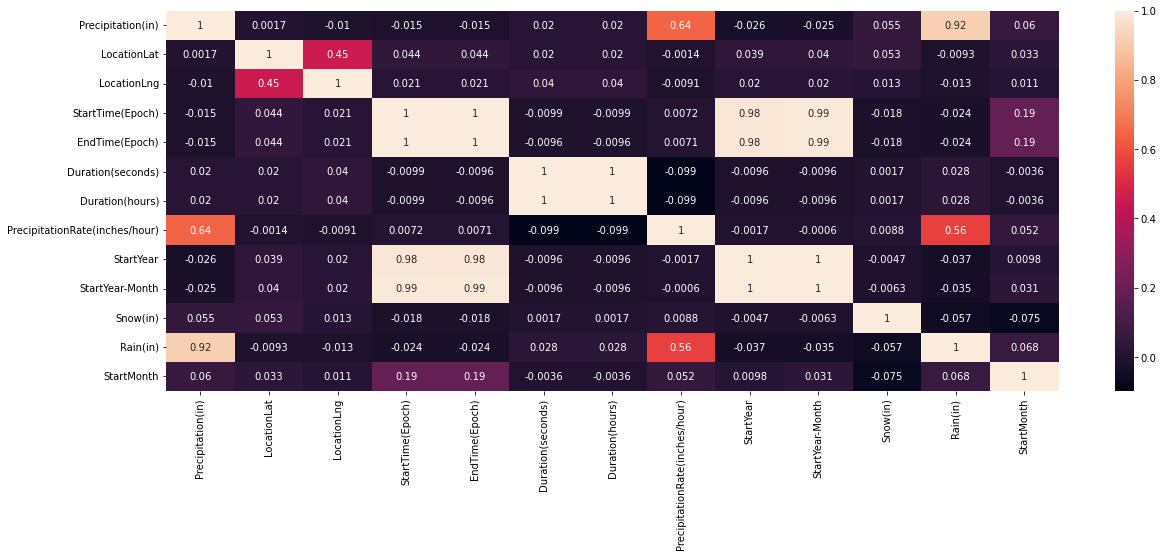

In [124]:
sns.heatmap(df.corr(), annot = True)
plt.rcParams['figure.figsize'] = (20,7)
plt.show()

### Here is the correlation heatmap using code derived from the example in the current task, Task 6.2.

#### First with raw matplotlib.

In [125]:
# NOTE:  The example from the Exercise needed to be tweaked, in order to omit from the axes
# the columns that are not amenable to correlation.

In [126]:
df.shape[1]

24

In [127]:
df.corr().shape[1]

13

In [128]:
df.columns

Index(['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)',
       'Precipitation(in)', 'TimeZone', 'AirportCode', 'LocationLat',
       'LocationLng', 'County', 'State', 'StartTime(Epoch)', 'EndTime(Epoch)',
       'Duration(seconds)', 'Duration(hours)',
       'PrecipitationRate(inches/hour)', 'Disbelievable', 'Region',
       'StartYear', 'StartYear-Month', 'Snow(in)', 'Rain(in)', 'StartMonth'],
      dtype='object')

In [129]:
df.corr().columns

Index(['Precipitation(in)', 'LocationLat', 'LocationLng', 'StartTime(Epoch)',
       'EndTime(Epoch)', 'Duration(seconds)', 'Duration(hours)',
       'PrecipitationRate(inches/hour)', 'StartYear', 'StartYear-Month',
       'Snow(in)', 'Rain(in)', 'StartMonth'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Matrix')

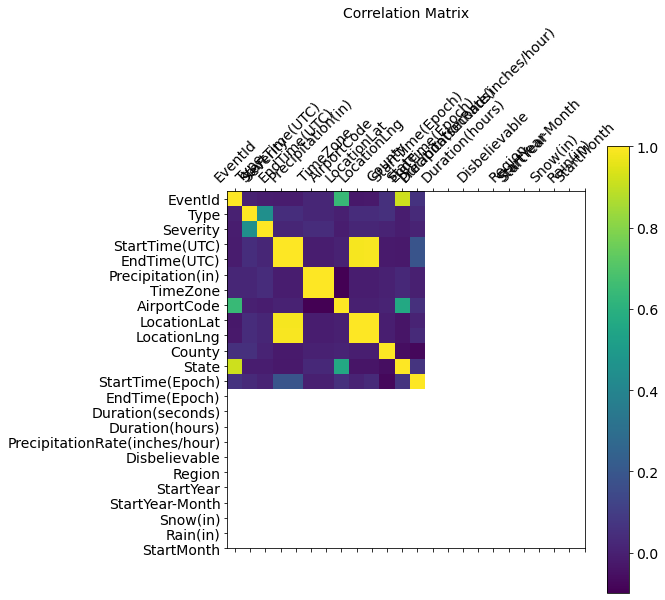

In [130]:
# Initial adaptation, with the extra columns distorting the axes.
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

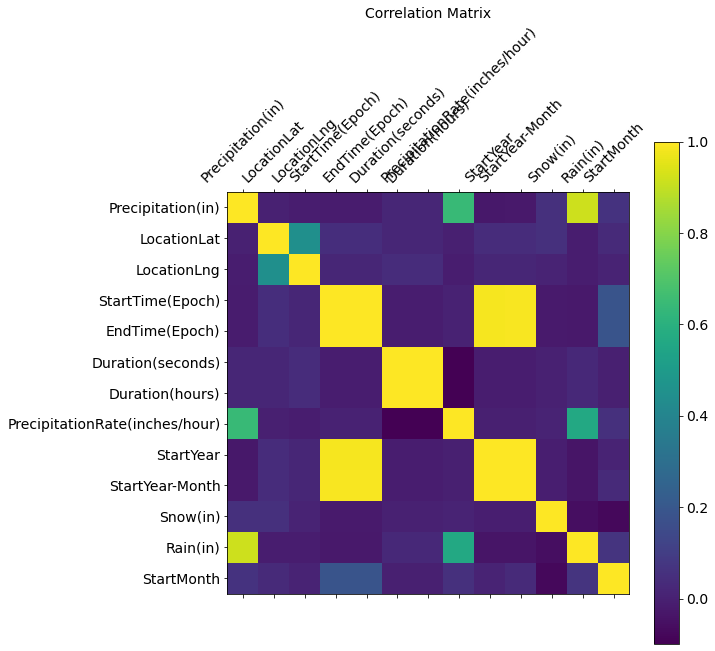

In [131]:
# A slight tweak to the plt.xticks and plt.yticks definitions removes the inappropriate columns.
f = plt.figure(figsize=(9, 9)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.corr().shape[1]), df.corr().columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.corr().shape[1]), df.corr().columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title
# REMEMBER!  plt.show() removes the plot from memory.  Therefore, you must save the plot to a file with
# plt.savefig() first, or else your file will be blank!
#plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', 'task-6.2-correlation-heatmap-matplotlib.png'), facecolor='white')
plt.show()

#### Now with seaborn.
#### NOTE:  I'm trying to be "lazy" in creating my subset dataframe, by avoiding typing/pasting all the specific column names, like they did in the Exercice 6.2 example.  After a couple of sanity checks, I *think* it works.

In [132]:
df.columns

Index(['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)',
       'Precipitation(in)', 'TimeZone', 'AirportCode', 'LocationLat',
       'LocationLng', 'County', 'State', 'StartTime(Epoch)', 'EndTime(Epoch)',
       'Duration(seconds)', 'Duration(hours)',
       'PrecipitationRate(inches/hour)', 'Disbelievable', 'Region',
       'StartYear', 'StartYear-Month', 'Snow(in)', 'Rain(in)', 'StartMonth'],
      dtype='object')

In [133]:
df.corr().columns

Index(['Precipitation(in)', 'LocationLat', 'LocationLng', 'StartTime(Epoch)',
       'EndTime(Epoch)', 'Duration(seconds)', 'Duration(hours)',
       'PrecipitationRate(inches/hour)', 'StartYear', 'StartYear-Month',
       'Snow(in)', 'Rain(in)', 'StartMonth'],
      dtype='object')

In [134]:
df_subset = df[df.corr().columns]

In [135]:
df_subset.shape

(22387, 13)

In [136]:
df_subset.head()

,Precipitation(in),LocationLat,LocationLng,StartTime(Epoch),EndTime(Epoch),Duration(seconds),Duration(hours),PrecipitationRate(inches/hour),StartYear,StartYear-Month,Snow(in),Rain(in),StartMonth
58939,0.0,41.3509,-71.8054,1451627580,1451920620,293040,81.40,0.0,2016,201601,0.0,0.0,1
58940,0.0,41.3509,-71.8054,1451920620,1451922780,2160,0.60,0.0,2016,201601,0.0,0.0,1
58941,0.0,41.3509,-71.8054,1451922780,1451929080,6300,1.75,0.0,2016,201601,0.0,0.0,1
58942,0.0,41.3509,-71.8054,1451929080,1451929980,900,0.25,0.0,2016,201601,0.0,0.0,1
58943,0.0,41.3509,-71.8054,1451933580,1451937180,3600,1.00,0.0,2016,201601,0.0,0.0,1


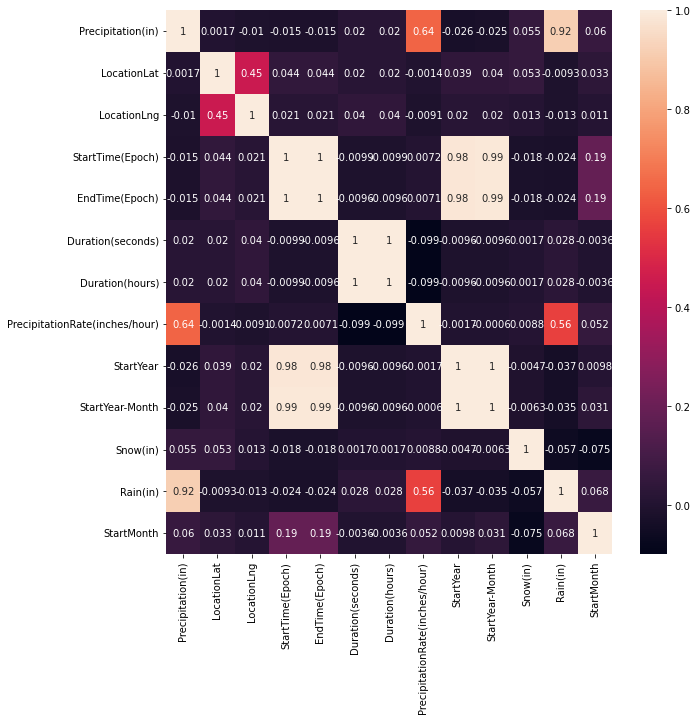

In [137]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_subset.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [138]:
df.groupby(['StartYear-Month']).mean().corr()

,Precipitation(in),LocationLat,LocationLng,StartTime(Epoch),EndTime(Epoch),Duration(seconds),Duration(hours),PrecipitationRate(inches/hour),StartYear,Snow(in),Rain(in),StartMonth
Precipitation(in),1.000000,0.307106,0.224124,-0.073656,-0.073662,-0.260504,-0.260504,0.867684,-1.362473e-01,-0.223440,0.942859,3.641484e-01
LocationLat,0.307106,1.000000,0.495771,0.301432,0.301432,-0.006823,-0.006823,0.309753,2.734299e-01,0.113589,0.229138,1.901678e-01
LocationLng,0.224124,0.495771,1.000000,0.245473,0.245476,0.094281,0.094281,0.253990,2.338499e-01,0.118814,0.146175,9.007073e-02
StartTime(Epoch),-0.073656,0.301432,0.245473,1.000000,1.000000,-0.091997,-0.091997,0.072428,9.859474e-01,-0.085543,-0.124998,1.670146e-01
EndTime(Epoch),-0.073662,0.301432,0.245476,1.000000,1.000000,-0.091975,-0.091975,0.072417,9.859476e-01,-0.085538,-0.125003,1.670132e-01
Duration(seconds),-0.260504,-0.006823,0.094281,-0.091997,-0.091975,1.000000,1.000000,-0.449675,-8.192337e-02,0.233525,-0.203199,-7.388175e-02
Duration(hours),-0.260504,-0.006823,0.094281,-0.091997,-0.091975,1.000000,1.000000,-0.449675,-8.192337e-02,0.233525,-0.203199,-7.388175e-02
PrecipitationRate(inches/hour),0.867684,0.309753,0.253990,0.072428,0.072417,-0.449675,-0.449675,1.000000,2.368682e-02,-0.272509,0.714261,2.974106e-01
StartYear,-0.136247,0.273430,0.233850,0.985947,0.985948,-0.081923,-0.081923,0.023687,1.000000e+00,-0.020801,-0.197378,1.614923e-14
Snow(in),-0.223440,0.113589,0.118814,-0.085543,-0.085538,0.233525,0.233525,-0.272509,-2.080061e-02,1.000000,-0.335386,-3.843715e-01


In [139]:
# Save the seaborn correlation heatmap.
#corr.figure.savefig(os.path.join(path, '04-Analysis', 'Visualizations', 'task-6.2-correlation-heatmap-seaborn.png'), facecolor='white', bbox_inches='tight')

### Step 3a) Discuss what the coefficients in the plot mean in terms of the relationships between the variables.


### Answer:
### There don't seem to be any insightful correlations among these variables.
### Obviously, precipitation rates and precipitation totals have a strong correlation, and the various time-related variables correlate, of course.
### Other than those, though, nothing quite makes the threshold of even a weak relationship (+/- 0.1).
### The closest are slight inverse relationships that Precipitation Rate has with Latitude (-0.096) and with event Duration (-0.074); the inverse relationship with Latitude might be worth investigating, but the inverse relationship with duration is counterintuitive.

# Step 4:  Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

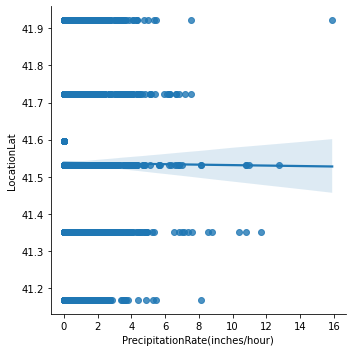

In [140]:
# Create a scatterplot for the "PrecipitationRate(inches/hour)" and "LocationLat" columns in seaborn
sns.lmplot(x = 'PrecipitationRate(inches/hour)', y = 'LocationLat', data = df_subset)
# Save the seaborn scatterplot.
#plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', 'task-6.2-correlation-scatter-PrecRate-LocLat-seaborn.png'), facecolor='white', bbox_inches='tight')

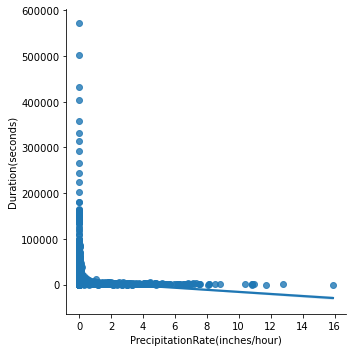

In [141]:
# Create a scatterplot for the "PrecipitationRate(inches/hour)" and "Duration(seconds)" columns in seaborn
sns.lmplot(x = 'PrecipitationRate(inches/hour)', y = 'Duration(seconds)', data = df_subset)
# Save the seaborn scatterplot.
#plt.savefig(os.path.join(path, '04-Analysis', 'Visualizations', 'task-6.2-correlation-scatter-PrecRate-DureSec-seaborn.png'), facecolor='white', bbox_inches='tight')

### Step 4a) Discuss the output in a markdown cell.

### Answer:
### There truly seems to be no linear correlation to discuss so far.
### Hopefully, once I start to investigate how the data acts over time, some good correlations will appear.

# Step 5:  Create a pair plot of the entire subset.

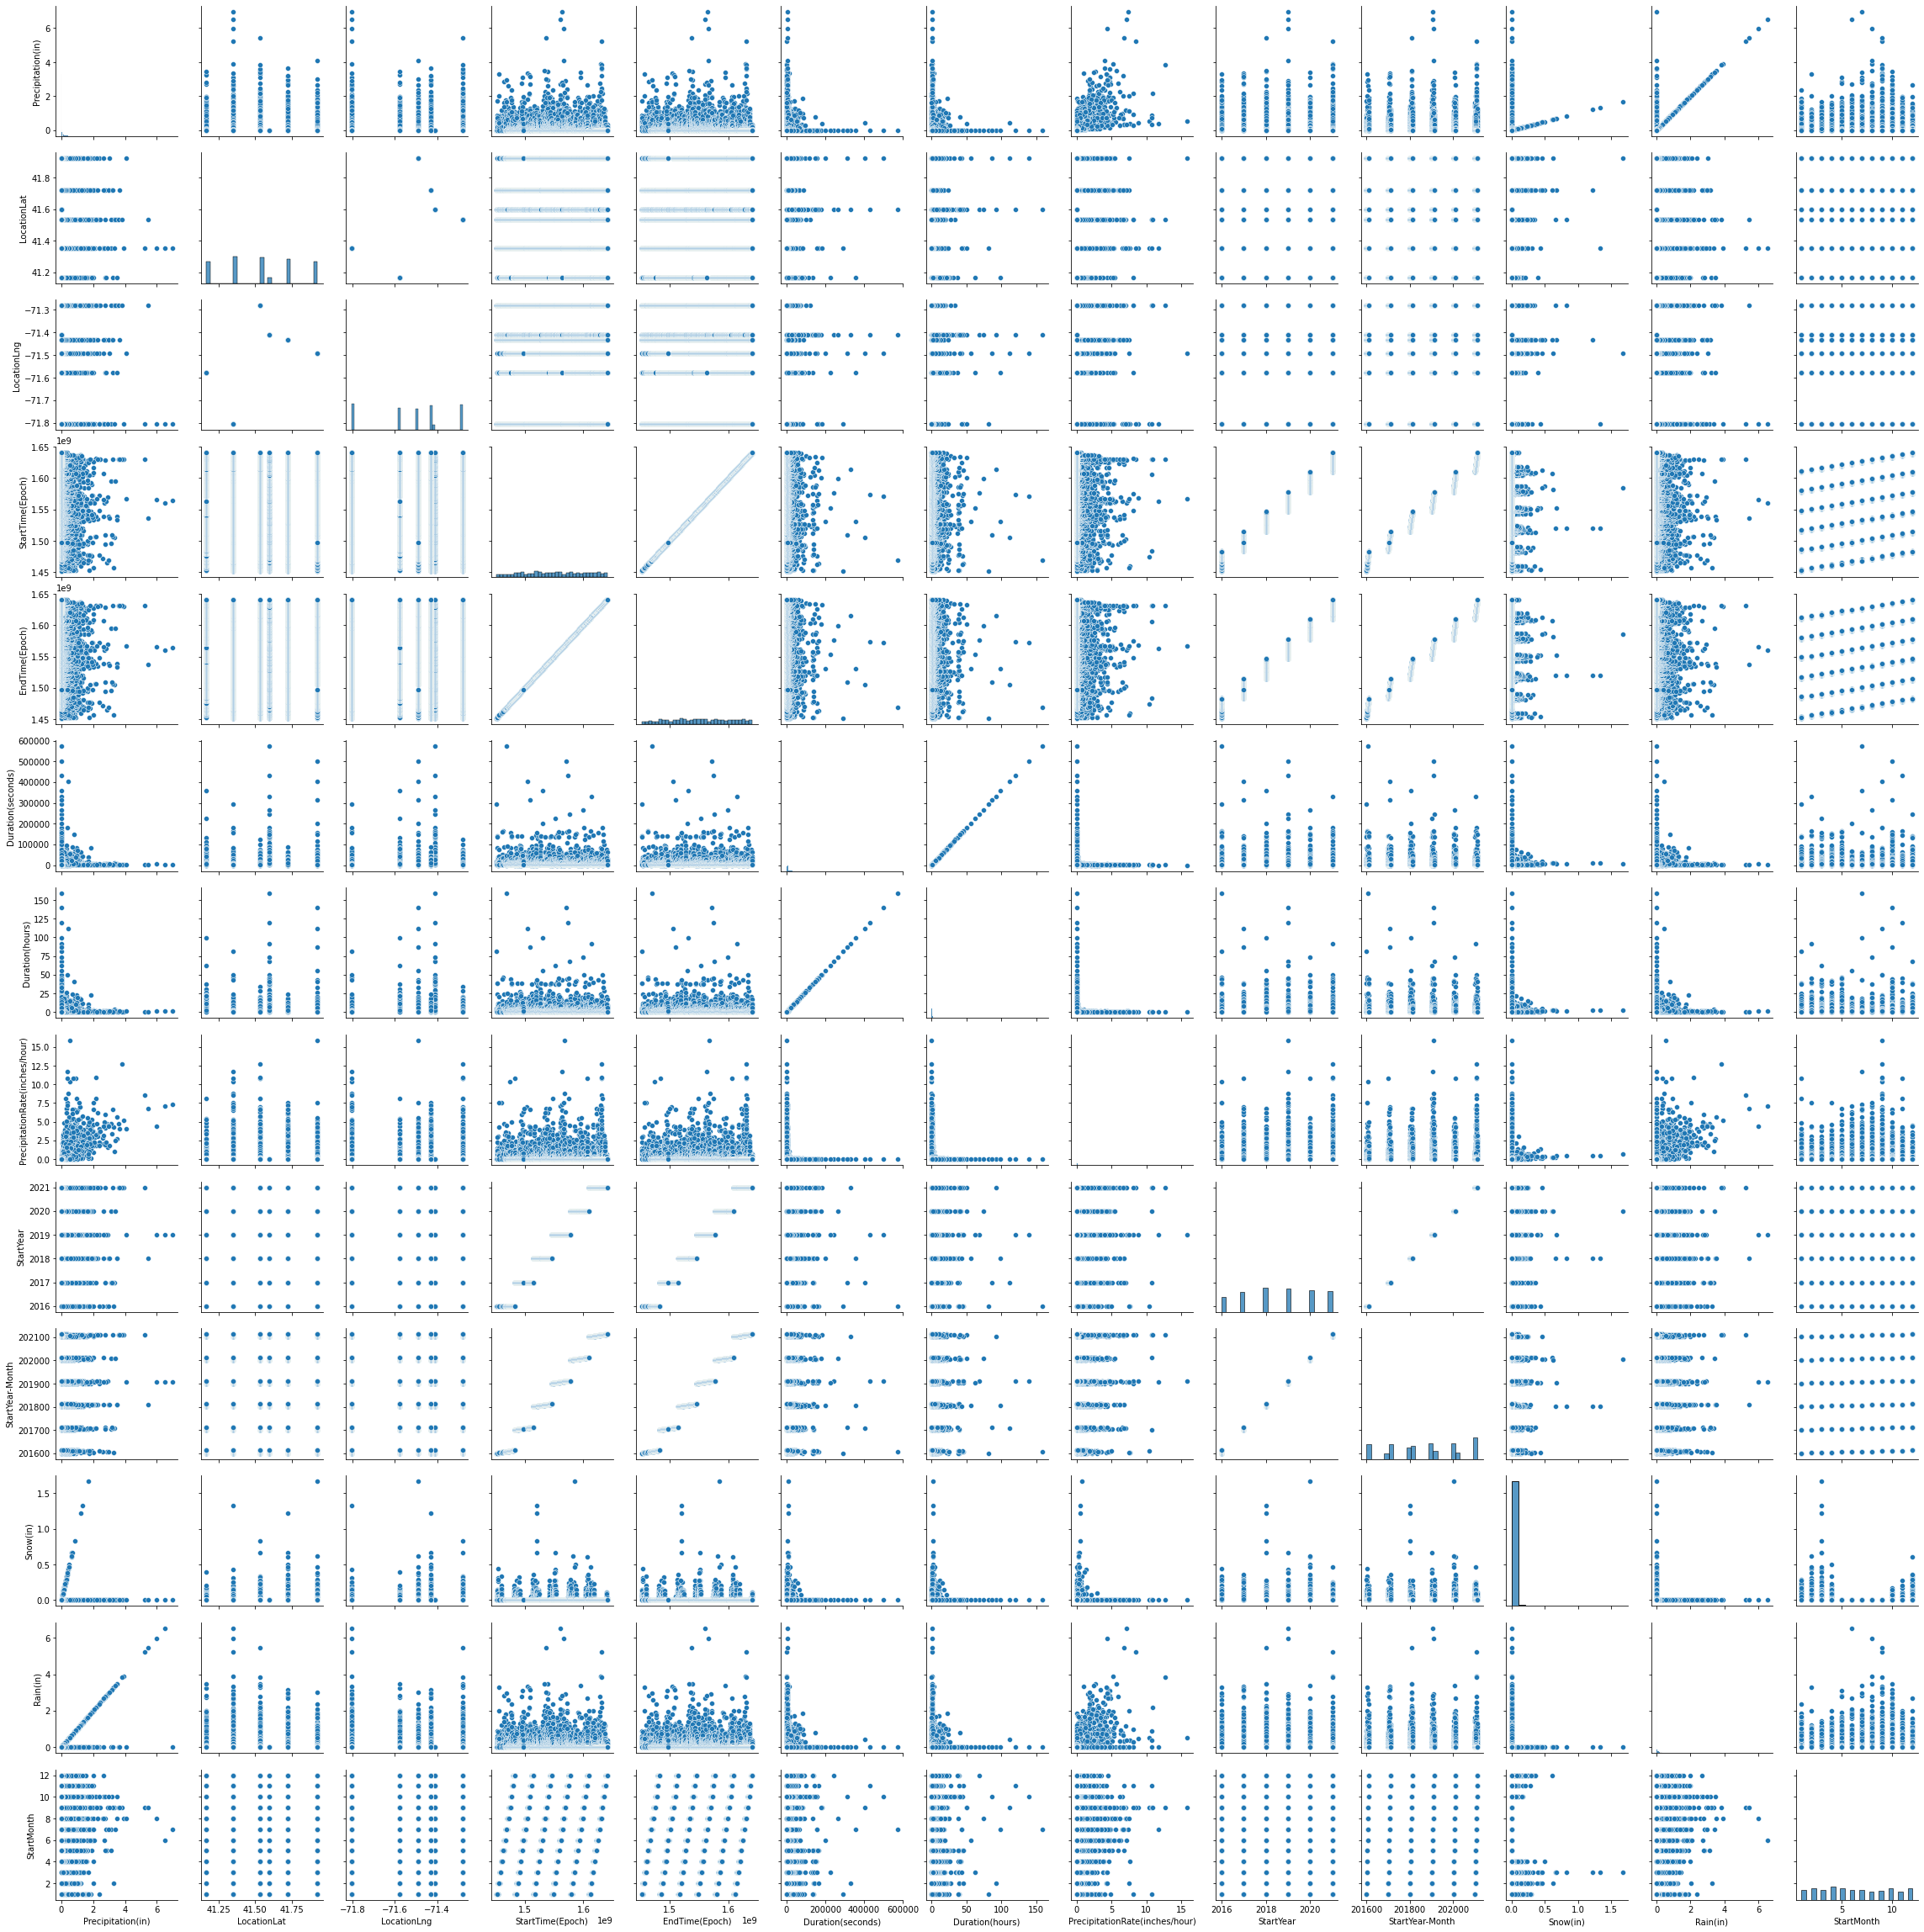

In [142]:
# Create a pair plot 

pair_plot = sns.pairplot(df_subset)

In [162]:
df_subset_2 = df[df.groupby(['StartYear-Month']).sum().corr().columns]

In [163]:
df_subset_2.head()

,Precipitation(in),LocationLat,LocationLng,StartTime(Epoch),EndTime(Epoch),Duration(seconds),Duration(hours),PrecipitationRate(inches/hour),StartYear,Snow(in),Rain(in),StartMonth
58939,0.0,41.3509,-71.8054,1451627580,1451920620,293040,81.40,0.0,2016,0.0,0.0,1
58940,0.0,41.3509,-71.8054,1451920620,1451922780,2160,0.60,0.0,2016,0.0,0.0,1
58941,0.0,41.3509,-71.8054,1451922780,1451929080,6300,1.75,0.0,2016,0.0,0.0,1
58942,0.0,41.3509,-71.8054,1451929080,1451929980,900,0.25,0.0,2016,0.0,0.0,1
58943,0.0,41.3509,-71.8054,1451933580,1451937180,3600,1.00,0.0,2016,0.0,0.0,1


In [164]:
df_subset_2['Rain(in)'].sort_values(ascending=False).head(20)

61628      6.53
61794      5.98
5862495    5.45
63425      5.25
63395      3.90
5865047    3.83
5862409    3.49
4950516    3.47
5864056    3.39
60135      3.34
5860766    3.28
4949665    3.23
6068651    3.16
59957      3.11
6219334    3.01
6069395    2.98
6067819    2.98
61854      2.91
59229      2.84
4951144    2.83
Name: Rain(in), dtype: float64

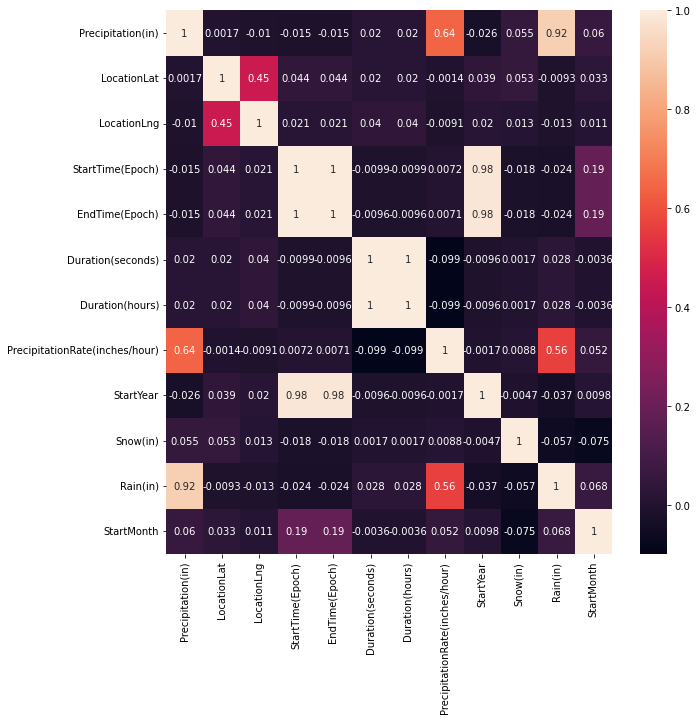

In [165]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_subset_2.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [145]:
df_subset_2.head()

,Precipitation(in),LocationLat,LocationLng,StartTime(Epoch),EndTime(Epoch),Duration(seconds),Duration(hours),PrecipitationRate(inches/hour),StartYear,Snow(in),Rain(in),StartMonth
58939,0.0,41.3509,-71.8054,1451627580,1451920620,293040,81.40,0.0,2016,0.0,0.0,1
58940,0.0,41.3509,-71.8054,1451920620,1451922780,2160,0.60,0.0,2016,0.0,0.0,1
58941,0.0,41.3509,-71.8054,1451922780,1451929080,6300,1.75,0.0,2016,0.0,0.0,1
58942,0.0,41.3509,-71.8054,1451929080,1451929980,900,0.25,0.0,2016,0.0,0.0,1
58943,0.0,41.3509,-71.8054,1451933580,1451937180,3600,1.00,0.0,2016,0.0,0.0,1


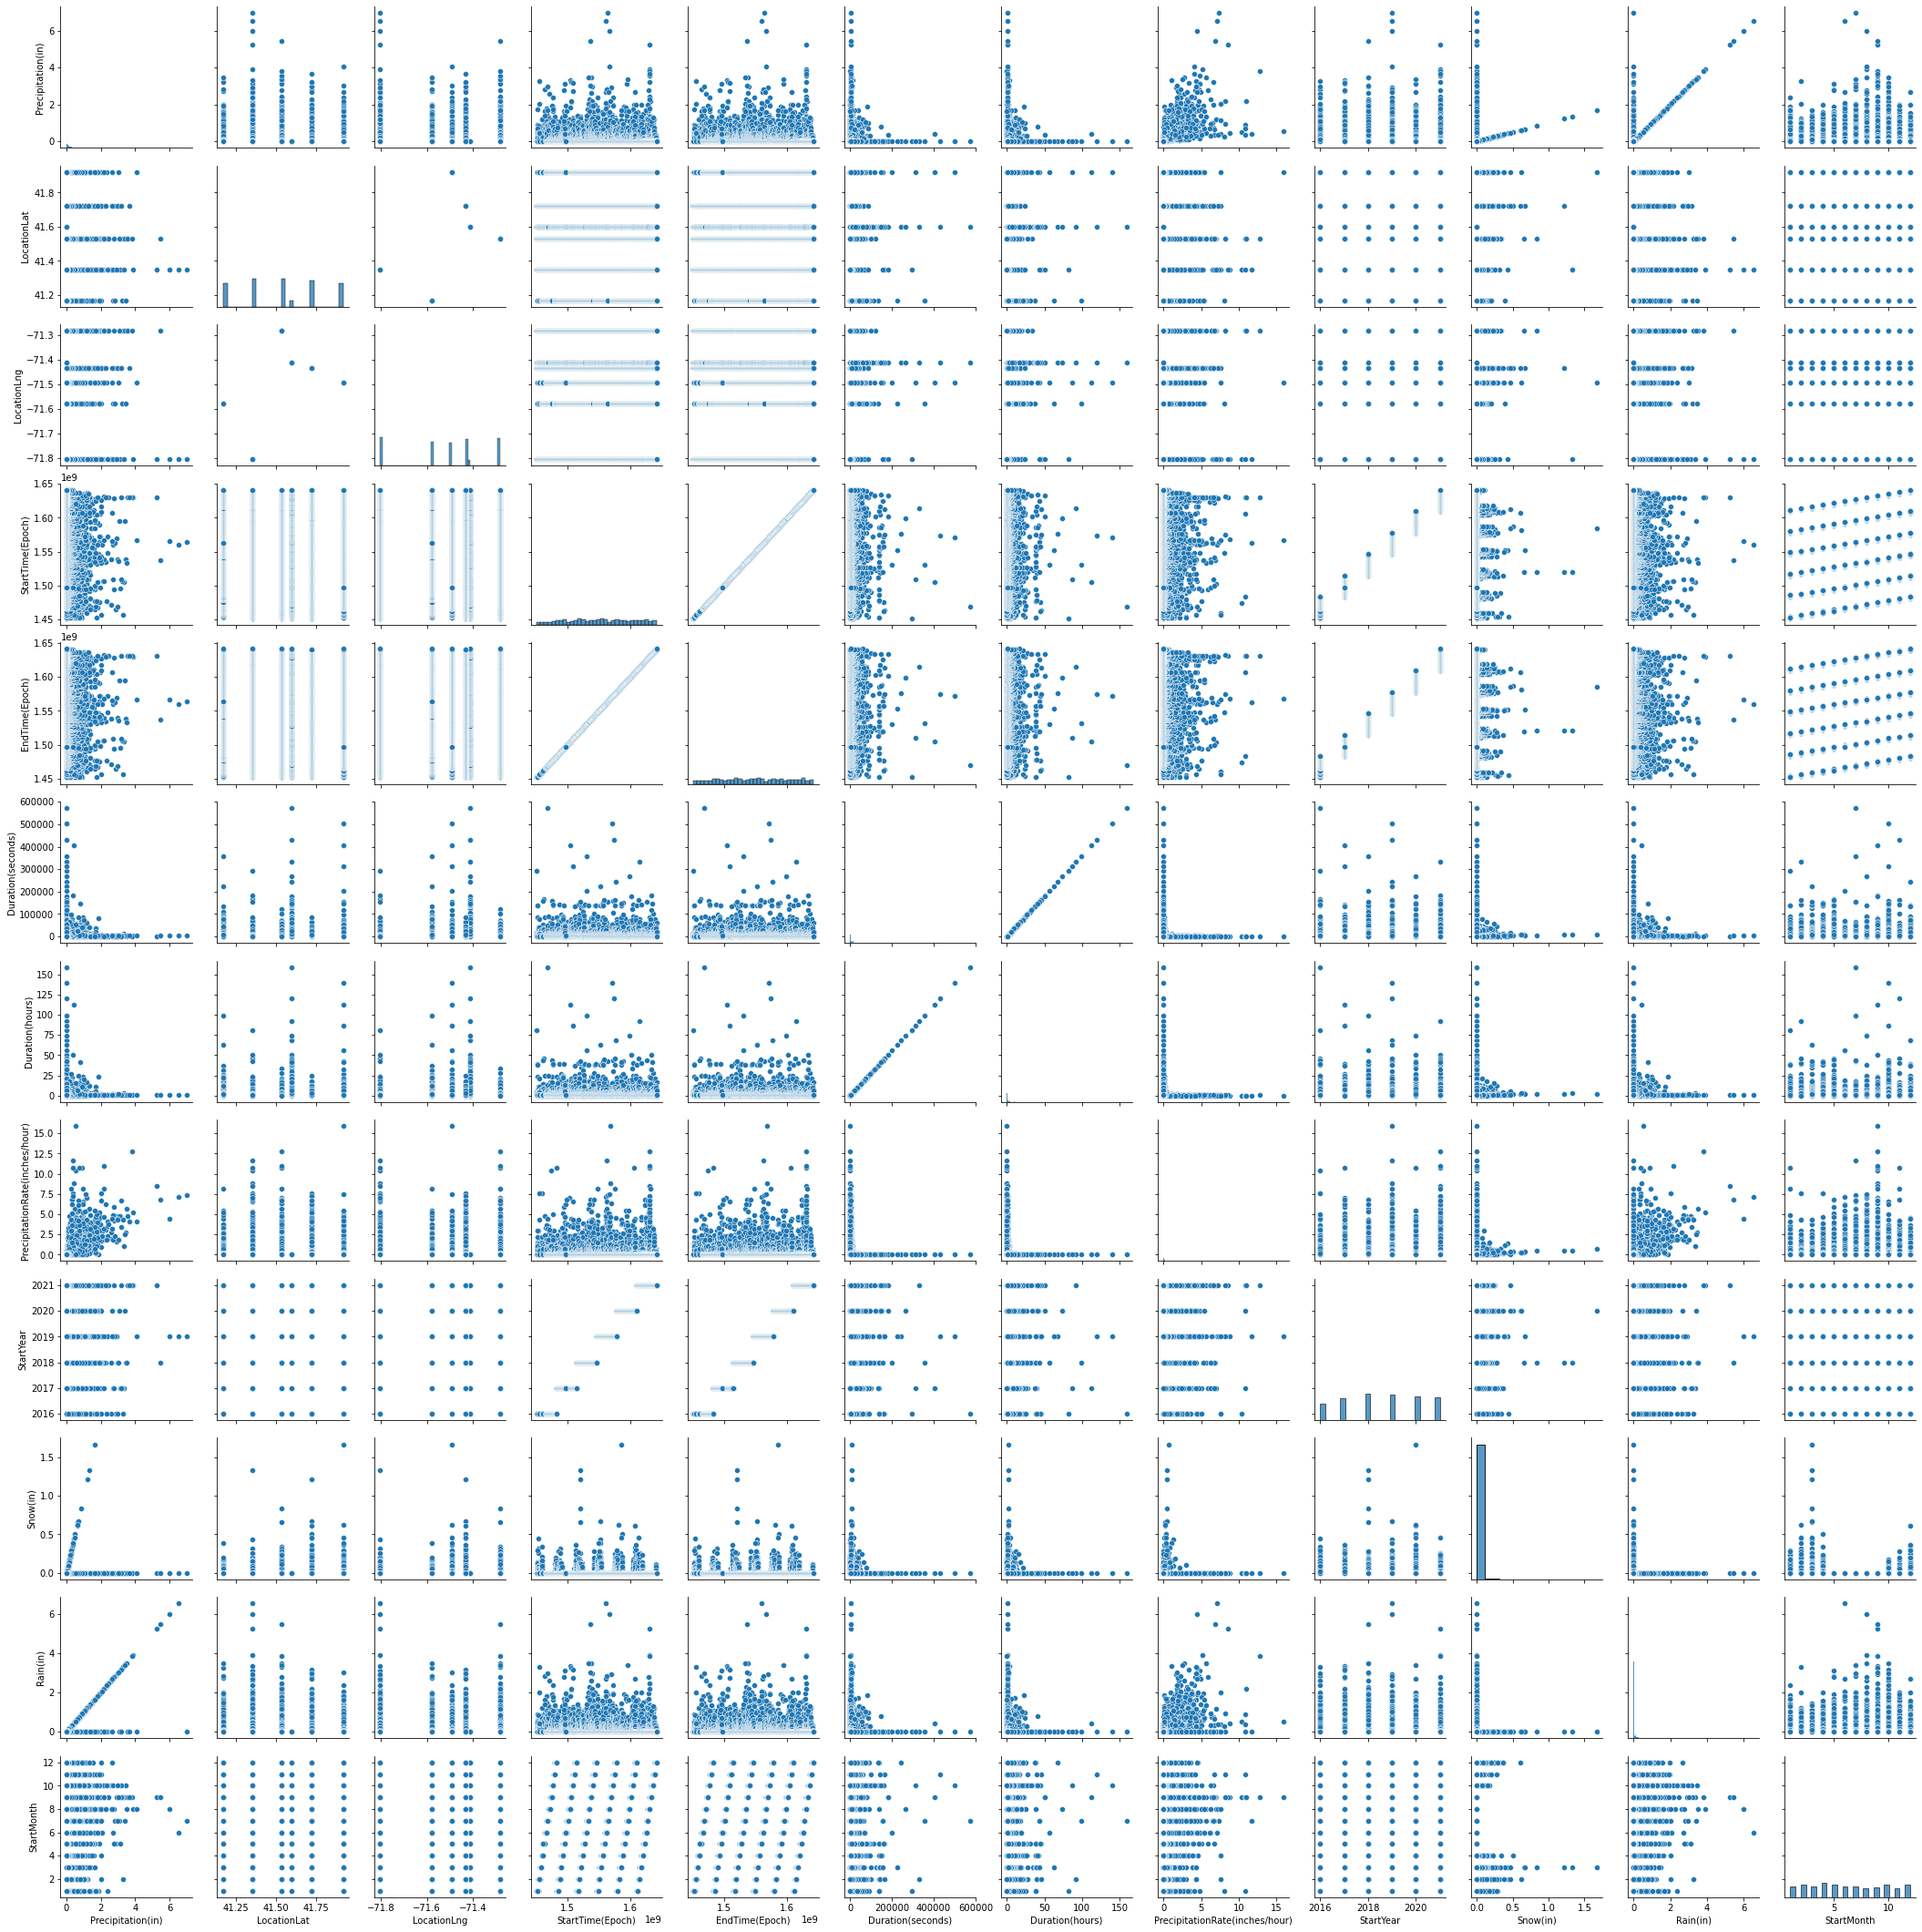

In [146]:
# Create a pair plot 

pair_plot = sns.pairplot(df_subset_2)

In [147]:
# Save the seaborn pairplot.
#pair_plot.figure.savefig(os.path.join(path, '04-Analysis', 'Visualizations', 'task-6.2-pairplot.png'), facecolor='white', bbox_inches='tight')

### Step 5a) Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.


### Answer:
### The only plots that show correlation are those comparing total precipitation amounts - the Precipitation(in) column - with the Duration columns.  However, while a clear line of correlation is visible, there are so many outliers that we don't see high correlation coefficients.  *This could mean that we need to separate the data further, somehow.*
### On a side note, it is reassuring to see that the scatterplots of Location Latitude vs. Location Longitude resemble maps of the 48 contiguous United States.  This would appear to confirm that we have fairly good geographical representation.
### Hopefully, once I start to investigate how the data acts over time, more correlations will appear.

# Step 6:  Create a categorical plot and interpret the results.

<AxesSubplot:xlabel='Duration(seconds)', ylabel='Count'>

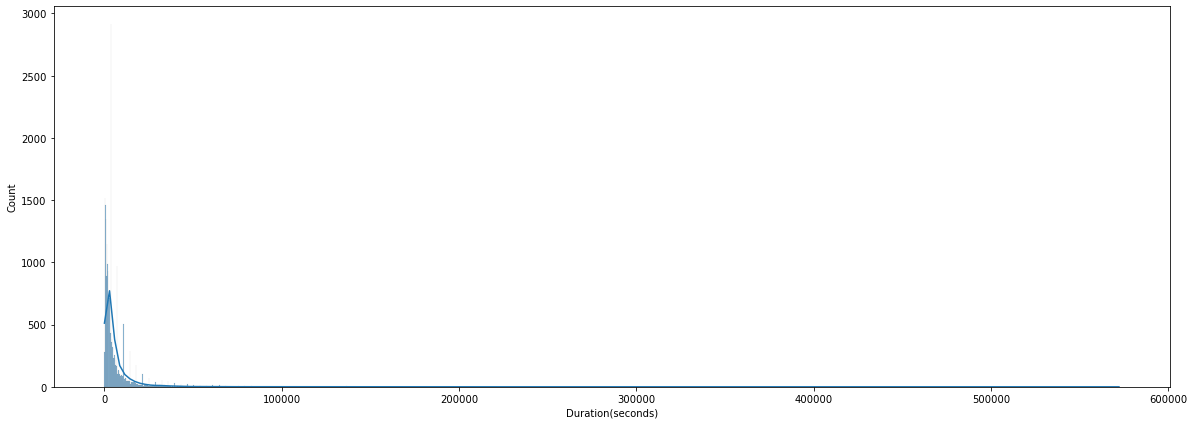

In [148]:
# Use a histogram to visualize the distribution of the 'Duration(seconds)' variable. 
# The argument "kde" adds a line that encompasses the distribution
sns.histplot(df_subset['Duration(seconds)'], bins = 2000, kde = True)

### Let's focus the histogram on durations of less than twelve hours (43,200 seconds).

<AxesSubplot:xlabel='Duration(seconds)', ylabel='Count'>

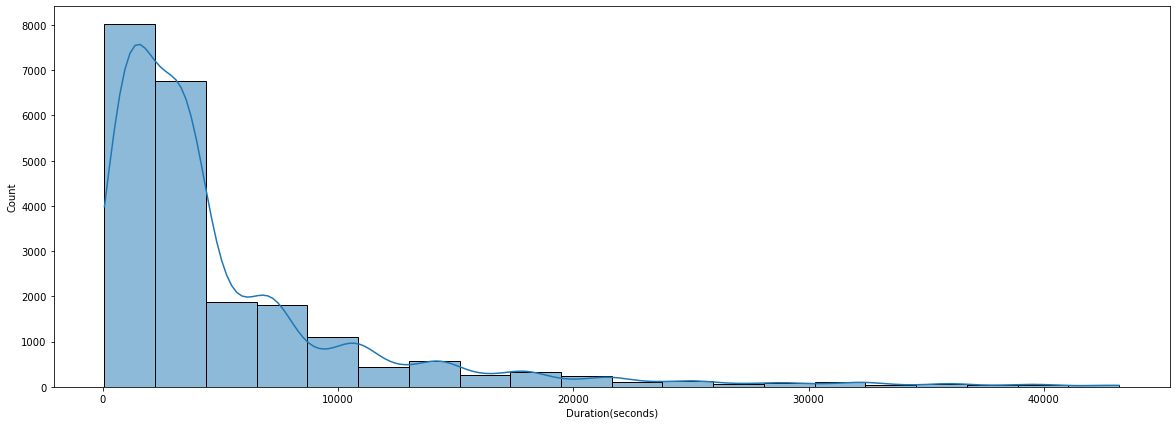

In [149]:
# Use a histogram to visualize the distribution of the 'Duration(seconds)' variable. 
# The argument "kde" adds a line that encompasses the distribution
sns.histplot(df_subset.loc[df_subset['Duration(seconds)'] <= 43200]['Duration(seconds)'], bins = 20, kde = True)

<AxesSubplot:xlabel='Precipitation(in)', ylabel='Count'>

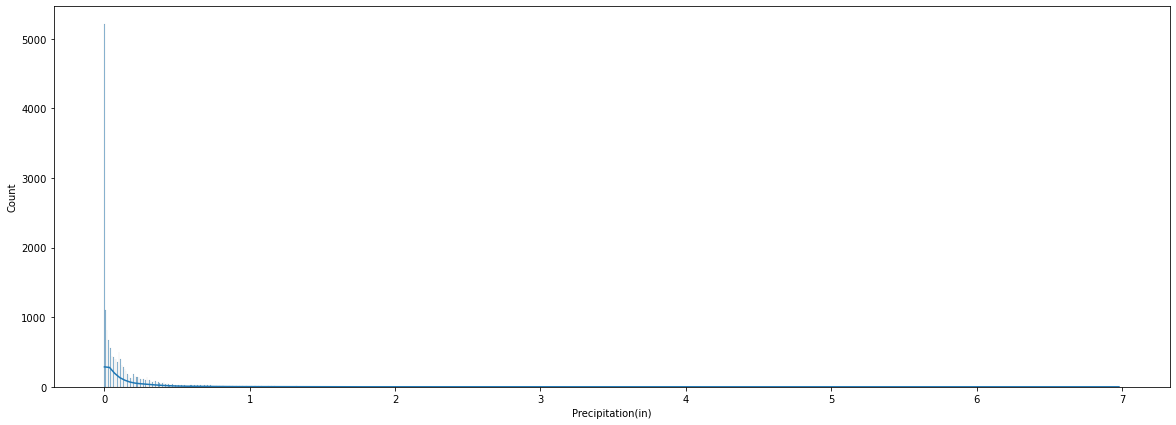

In [150]:
# Use a histogram to visualize the distribution of the 'Precipitation(in)' variable.
# NOTE:  We need to filter on events of Type 'Rain' or 'Snow' or 'Precipitation' to get non-zero amounts.
# Therefore, we need to return to using our larger 'df' dataframe, which contains the 'Type' column.
# The argument "kde" adds a line that encompasses the distribution
sns.histplot(df.loc[(df['Type'] == 'Precipitation') | (df['Type'] == 'Rain') | (df['Type'] == 'Snow')]['Precipitation(in)'], bins = 2000, kde = True)

### Can we make a more informative histogram of total precipitation by cutting out the top 25%?

In [151]:
df.loc[(df['Type'] == 'Precipitation') | (df['Type'] == 'Rain') | (df['Type'] == 'Snow')]['Precipitation(in)'].describe()

count    16537.000000
mean         0.141217
std          0.287202
min          0.000000
25%          0.000000
50%          0.040000
75%          0.160000
max          6.980000
Name: Precipitation(in), dtype: float64

### Unfortunately, the vast majority of even "wet" events have precipitation amounts under one-tenth of an inch.  It is difficult to feel confident in such measurements.

### How about *rates* of precipitation, then?

<AxesSubplot:xlabel='PrecipitationRate(inches/hour)', ylabel='Count'>

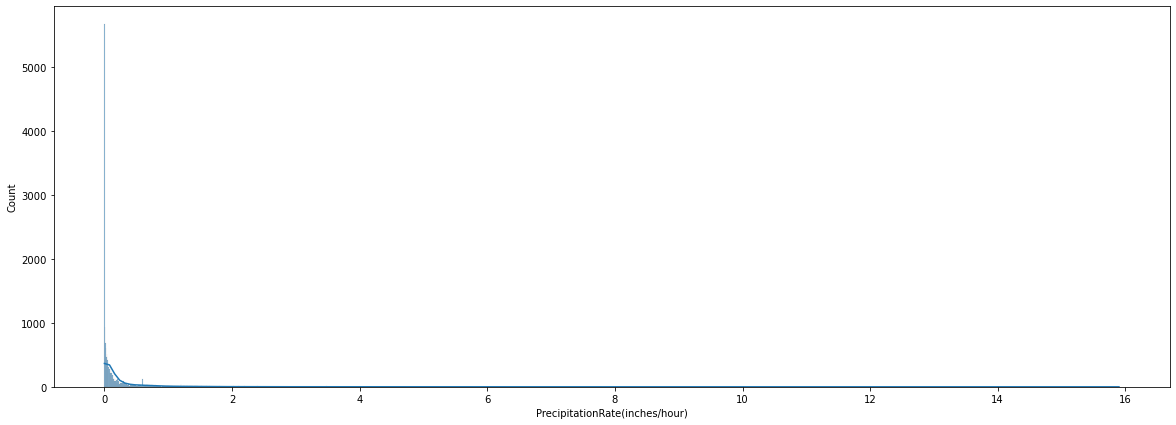

In [152]:
# Use a histogram to visualize the distribution of the 'PrecipitationRate(inches/hour)' variable. 
# NOTE:  We need to filter on events of Type 'Rain' or 'Snow' or 'Precipitation' to get non-zero amounts.
# Therefore, we need to return to using our larger 'df' dataframe, which contains the 'Type' column.
# The argument "kde" adds a line that encompasses the distribution
#sns.histplot(df_subset['PrecipitationRate(inches/hour)'], bins = 2000, kde = True)
sns.histplot(df.loc[(df['Type'] == 'Precipitation') | (df['Type'] == 'Rain') | (df['Type'] == 'Snow')]['PrecipitationRate(inches/hour)'], bins = 2000, kde = True)

### Again, we have wide-ranging values skewed toward zero.
### Again, can we make a more informative histogram of total precipitation by cutting out the top 25%?

In [153]:
df.loc[(df['Type'] == 'Precipitation') | (df['Type'] == 'Rain') | (df['Type'] == 'Snow')]['PrecipitationRate(inches/hour)'].describe()

count    16537.000000
mean         0.246144
std          0.659541
min          0.000000
25%          0.000000
50%          0.037500
75%          0.184615
max         15.900000
Name: PrecipitationRate(inches/hour), dtype: float64

### Unfortunately, the majority of even "wet" events also have precipitation *rates* under one-tenth of an inch per hour.  It is difficult to feel confident in such measurements.

# Step 7:  Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

### All questions raisde in Task 6.1 require analyzing the data over time, which we have not yet done.
### Here are the questions:
### 1) Have the frequencies, mean durations, or other characteristics of particular types of events changed over time?
### 2) How closely do latitude and longitude correlate with the frequency of particular types of events?
### 3) Do any correlation coefficients change significantly from year to year?

# Step 8:  Define any hypotheses that you can at this point. You’ll be testing these later on.

### The hypotheses will depend on time-based analysis, as well.  The current data, without correlations, does not present any obvious hypothesis to test.

# Repeating some analysis with a smaller set of columns, to make it easier to focus.

In [154]:
df.columns

Index(['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)',
       'Precipitation(in)', 'TimeZone', 'AirportCode', 'LocationLat',
       'LocationLng', 'County', 'State', 'StartTime(Epoch)', 'EndTime(Epoch)',
       'Duration(seconds)', 'Duration(hours)',
       'PrecipitationRate(inches/hour)', 'Disbelievable', 'Region',
       'StartYear', 'StartYear-Month', 'Snow(in)', 'Rain(in)', 'StartMonth'],
      dtype='object')

In [155]:
df_smaller_subset = df[['Duration(seconds)','Duration(hours)', 'StartYear', 'StartYear-Month', 'StartMonth', 'Snow(in)', 'Rain(in)', 'PrecipitationRate(inches/hour)']]

In [156]:
df_smaller_subset.columns

Index(['Duration(seconds)', 'Duration(hours)', 'StartYear', 'StartYear-Month',
       'StartMonth', 'Snow(in)', 'Rain(in)', 'PrecipitationRate(inches/hour)'],
      dtype='object')

In [157]:
df_smaller_subset.shape

(22387, 8)

In [158]:
df_smaller_subset.corr()

,Duration(seconds),Duration(hours),StartYear,StartYear-Month,StartMonth,Snow(in),Rain(in),PrecipitationRate(inches/hour)
Duration(seconds),1.000000,1.000000,-0.009553,-0.009625,-0.003593,0.001738,0.027824,-0.098624
Duration(hours),1.000000,1.000000,-0.009553,-0.009625,-0.003593,0.001738,0.027824,-0.098624
StartYear,-0.009553,-0.009553,1.000000,0.999771,0.009778,-0.004745,-0.036770,-0.001711
StartYear-Month,-0.009625,-0.009625,0.999771,1.000000,0.031193,-0.006348,-0.035292,-0.000603
StartMonth,-0.003593,-0.003593,0.009778,0.031193,1.000000,-0.074953,0.068263,0.051689
Snow(in),0.001738,0.001738,-0.004745,-0.006348,-0.074953,1.000000,-0.057401,0.008816
Rain(in),0.027824,0.027824,-0.036770,-0.035292,0.068263,-0.057401,1.000000,0.564878
PrecipitationRate(inches/hour),-0.098624,-0.098624,-0.001711,-0.000603,0.051689,0.008816,0.564878,1.000000


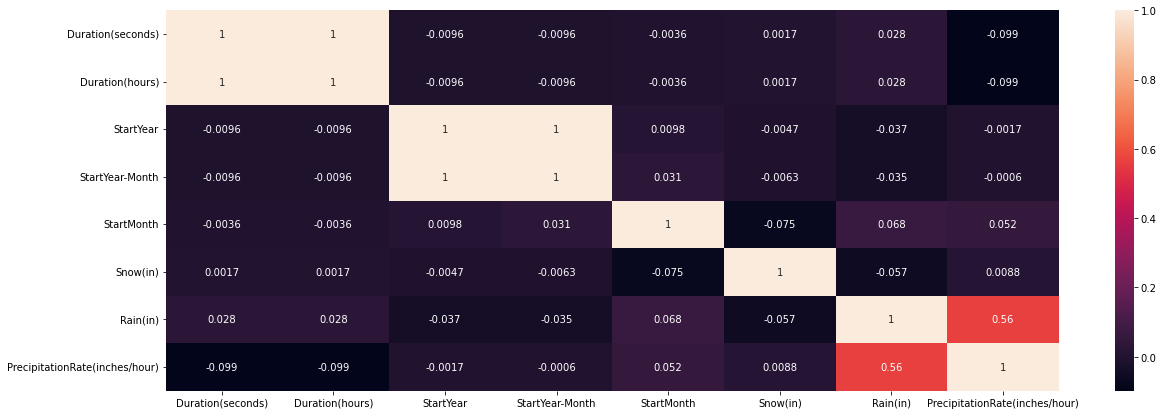

In [159]:
sns.heatmap(df_smaller_subset.corr(), annot = True)
plt.rcParams['figure.figsize'] = (20,7)
plt.show()

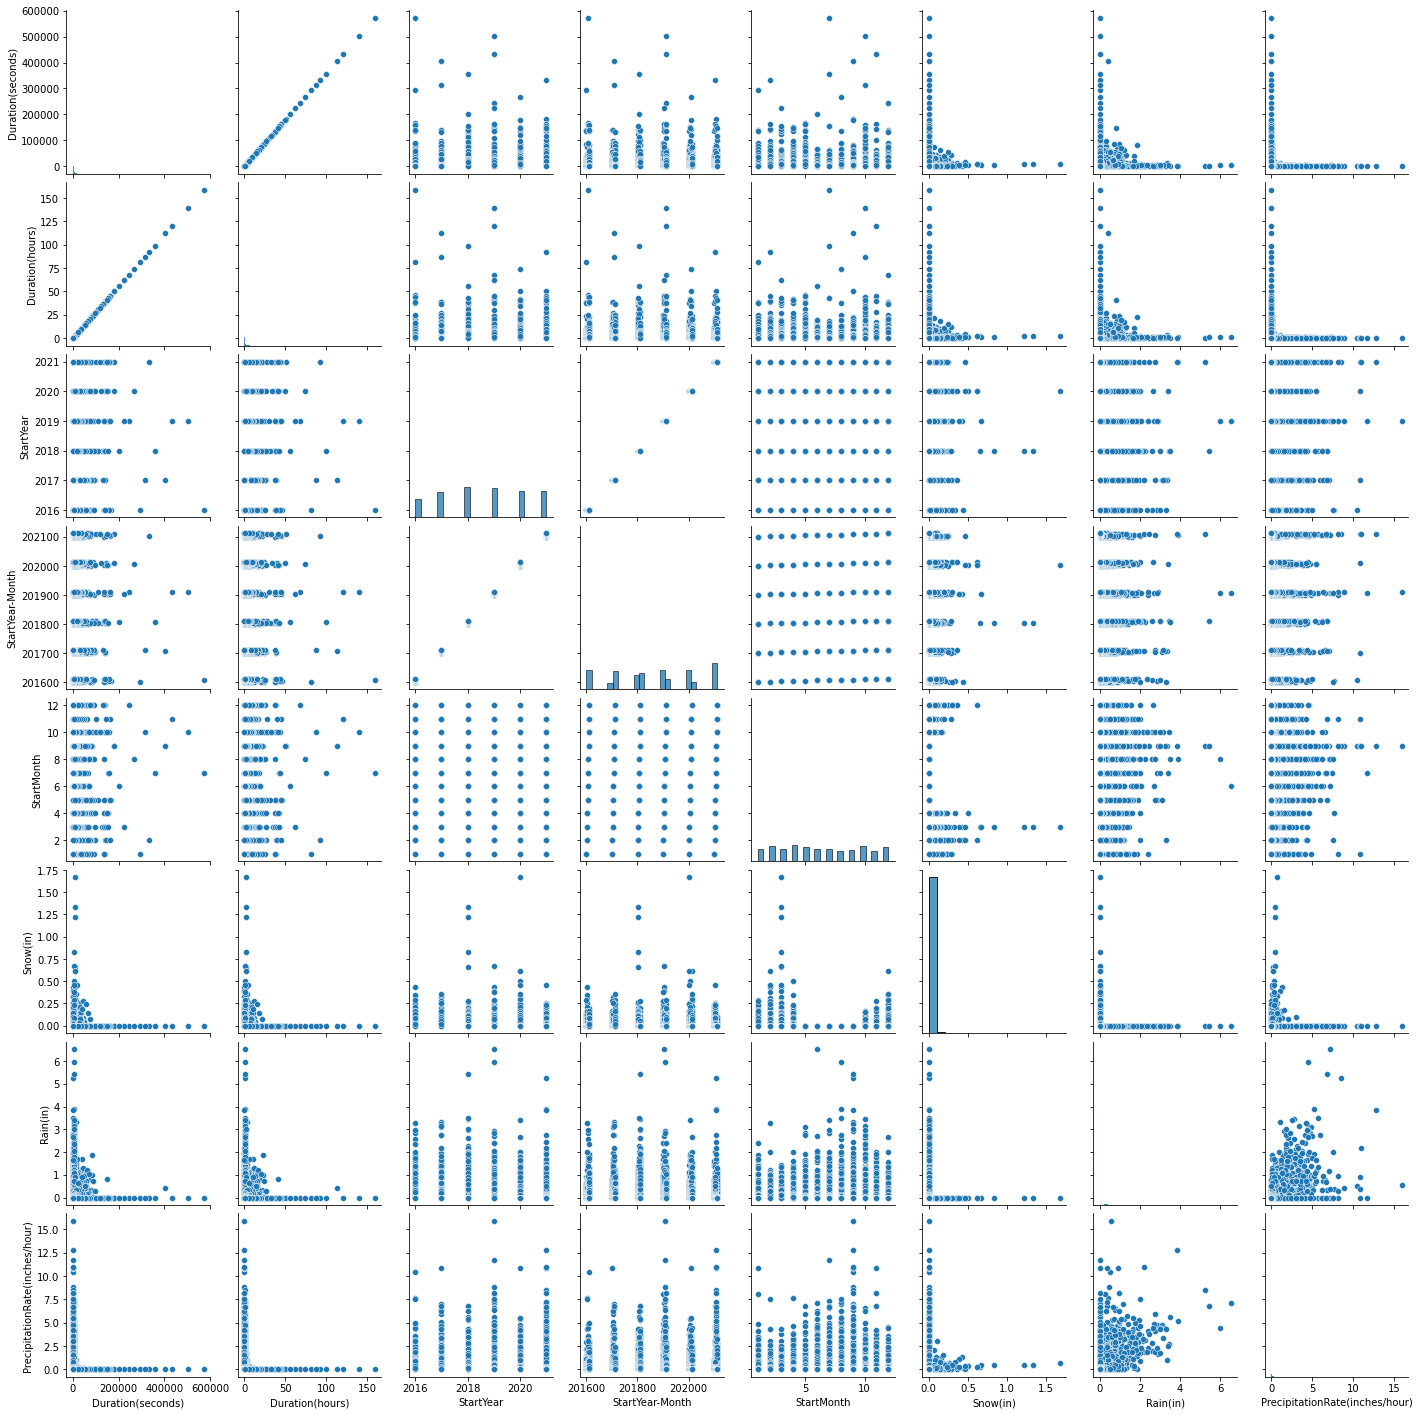

In [160]:
# Create a pair plot 

pair_plot = sns.pairplot(df_smaller_subset)

# Below this is cruft from our previous Notebook.  DO NOT EXECUTE!

In [161]:
# MAKE SURE WE STOP, BY PRETENDING THE USER HIT CTRL-C.
raise KeyboardInterrupt("Stop execution here")

KeyboardInterrupt: Stop execution here

In [ ]:
# Test to make sure this interruption code really works!
print ("Oh crap, we're still going!"

# STOP.  DO NOT EXECUTE ANY CELLS BELOW THIS ONE.

In [ ]:
# Let's save the new Dataframes created in this Task.

In [ ]:
df_no_city_zip.to_pickle(os.path.join(path, '02-Data','Prepared-Data', 'plausible_no_cities_or_zipcodes.Task-6.2.pkl'))

In [ ]:
df_subset.to_pickle(os.path.join(path, '02-Data','Prepared-Data', 'numerical_subset_of_plausible_no_cities_or_zipcodes.Task-6.1.pkl'))

# Addendum:  Splitting the dataset by Climatic Region
### According to the National Oceanic and Atmospheric Administration's (NOAA) National Centers for Environmental Information (NCEI), the area of the contiguous United States can be divided into nine distinct climatic regions, each comprising a group of states:

### 1) Northeast:  Connecticut, Delaware, Maine, Maryland, Massachusetts, New Hampshire, New Jersey, New York, Pennsylvania, Rhode Island, Vermont
### 2) Upper Midwest:  Iowa, Michigan, Minnesota, Wisconsin
### 3) Ohio Valley:  Illinois, Indiana, Kentucky, Missouri, Ohio, Tennessee, West Virginia
### 4) Southeast:  Alabama, Florida, Georgia, North Carolina, South Carolina, Virginia
### 5) Northern Rockies and Plains:  Montana, Nebraska, North Dakota, South Dakota, Wyoming
### 6) South:  Arkansas, Kansas, Louisiana, Mississippi, Oklahoma, Texas
### 7) Southwest:  Arizona, Colorado, New Mexico, Utah
### 8) Northwest:  Idaho, Oregon, Washington
### 9) West:  California, Nevada

### From https://www.ncei.noaa.gov/access/monitoring/reference-maps/us-climate-regions :
#### "Through climate analysis, National Centers for Environmental Information scientists have identified nine climatically consistent regions within the contiguous United States which are useful for putting current climate anomalies into a historical perspective (Karl and Koss, 1984)."
##### Source:  Thomas R. Karl and Walter James Koss, 1984: "Regional and National Monthly, Seasonal, and Annual Temperature Weighted by Area, 1895-1983." Historical Climatology Series 4-3, National Climatic Data Center, Asheville, NC, 38 pp.


## The dataset studied in Tasks 6.1 and 6.2 may be better analyzed by dividing based on the climatic region of each state.

In [ ]:
# Define our regions based on the description above; our dataset uses two-letter abbreviations, which I generated manually.

In [ ]:
reg_1_ne = ['CT', 'DE', 'ME', 'MD', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT']
reg_2_umw = ['IA', 'MI', 'MN', 'WI']
reg_3_ov = ['IL', 'IN', 'KY', 'MO', 'OH', 'TN', 'WV']
reg_4_se = ['AL', 'FL', 'GA', 'NC', 'SC', 'VA']
reg_5_nrap = ['MT', 'NE', 'ND', 'SD', 'WY']
reg_6_s = ['AR', 'KS', 'LA', 'MS', 'OK', 'TX']
reg_7_sw = ['AZ', 'CO', 'NM', 'UT']
reg_8_nw = ['ID', 'OR', 'WA']
reg_9_w = ['CA', 'NV']

In [ ]:
# Build a new 'Region' column based on matches for these groups of states.

In [ ]:
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_1_ne), 'Region'] = 'Northeast'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_2_umw), 'Region'] = 'Upper Midwest'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_3_ov), 'Region'] = 'Ohio Valley'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_4_se), 'Region'] = 'Southeast'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_5_nrap), 'Region'] = 'Northern Rockies and Plains'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_6_s), 'Region'] = 'South'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_7_sw), 'Region'] = 'Southwest'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_8_nw), 'Region'] = 'Northwest'
df_no_city_zip.loc[df_no_city_zip['State'].isin(reg_9_w), 'Region'] = 'West'

In [ ]:
# Let's assign this modified dataframe a new name.

In [ ]:
df_all_states_regions = df_no_city_zip

In [ ]:
# Quick sanity-checks of the new dataframe.

In [ ]:
df_all_states_regions.shape

In [ ]:
df_all_states_regions.head()

In [ ]:
df_all_states_regions.tail()

In [ ]:
# Save the df_all_states_regions dataframe for future loading, even though I doubt we'll use it.

In [ ]:
df_all_states_regions.to_pickle(os.path.join(path, '02-Data','Prepared-Data', 'df_all_states_regions.Task-6.2.pkl'))

## Split the df_all_states_regions dataframe into a separate dataframe for each region.  This offers two advantages.
## 1) Each region can be analyzed separately for correlations and trends.
## 2) CPU-intensive operations can be run for reach region in a separate Jupyter Notebook, allowing us to take advantage of multiple CPUs for simultaneous processing, avoiding the singl-CPU bottleneck.

In [ ]:
for region_name in df_all_states_regions['Region'].unique():
    # Replace uppercase letters with lowercase letters
    region_code = region_name.lower()
    
    # Replace spaces with underscores
    region_code = region_code.replace(' ', '_')
    
    # Create a new dataframe and assign it to a dynamically generated variable name
    globals()['df_' + region_code] = df_all_states_regions.loc[df_all_states_regions['Region'] == region_name]
    
    print ('df_' + region_code)
    print(globals()['df_' + region_code].shape)
    
    # Save each new dataframe to a pickle file.
    globals()['df_' + region_code].to_pickle(os.path.join(path, '02-Data','Prepared-Data', 'df_' + region_code + '.Task-6.2.pkl'))
    print()